# Задание 5. Извлечение данных 

## Задание 5.1

Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или аналогичных библиотек, постройте график числа сообщений в зависимости от даты. 

In [ ]:
%pip install -q telethon

In [ ]:
%python ChannelMessages.py

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy

In [12]:
df = pd.read_json(r'channel_messages.json', encoding='utf8')
df.head()

,_,id,peer_id,date,message,out,mentioned,media_unread,silent,post,...,views,forwards,replies,edit_date,post_author,grouped_id,reactions,restriction_reason,ttl_period,action
0,Message,141866,"{'_': 'PeerChannel', 'channel_id': 1367082089}",2022-12-14 09:00:00+00:00,Народные отчеты о вакцинации\n\n⚠️ ТОЛЬКО ПУБЛ...,False,False,False,False,False,...,NaN,NaN,"{'_': 'MessageReplies', 'replies': 0, 'replies...",None,NaN,NaN,NaN,[],NaN,NaN
1,Message,141863,"{'_': 'PeerChannel', 'channel_id': 1367082089}",2022-12-12 23:10:46+00:00,#дети\nМ 13 лет. спутник м. \n1я доза 23.10.2...,False,False,False,False,False,...,NaN,NaN,"{'_': 'MessageReplies', 'replies': 0, 'replies...",None,NaN,NaN,NaN,[],NaN,NaN
2,Message,141859,"{'_': 'PeerChannel', 'channel_id': 1367082089}",2022-12-12 06:30:00+00:00,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,False,False,False,False,False,...,NaN,NaN,"{'_': 'MessageReplies', 'replies': 0, 'replies...",None,NaN,NaN,NaN,[],NaN,NaN
3,Message,141848,"{'_': 'PeerChannel', 'channel_id': 1367082089}",2022-12-09 07:23:43+00:00,#ревак #назально #спутник \nМ 49 вторая доза...,False,False,False,False,False,...,NaN,NaN,None,None,NaN,NaN,NaN,[],NaN,NaN
4,Message,141838,"{'_': 'PeerChannel', 'channel_id': 1367082089}",2022-12-07 11:40:55+00:00,"Уточните даты вакцинации, пожалуйста. Если ваш...",False,False,False,False,False,...,NaN,NaN,None,None,NaN,NaN,NaN,[],NaN,NaN


In [13]:
df = df.sort_values(by='date')
df['date'] = df['date'].dt.date
date = df['date']
#df.head()
counts = date.value_counts()
print(counts)

2021-01-06    834
2021-01-11    639
2021-01-12    588
2021-01-10    544
2021-01-07    451
             ... 
2022-07-03      1
2022-06-24      1
2022-06-23      1
2022-06-20      1
2022-12-14      1
Name: date, Length: 590, dtype: int64


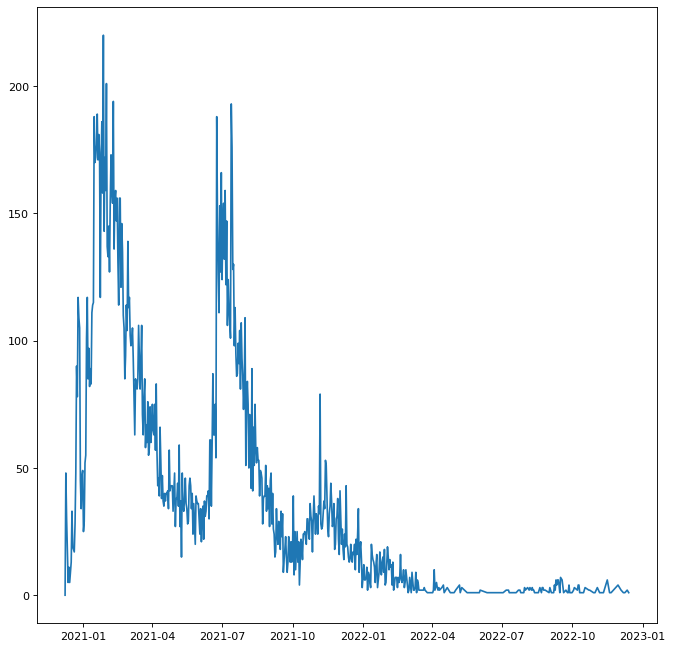

In [14]:
df_1 = df.groupby('date')['message'].count()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)

## Задание 5.2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательна визуализация. 

In [16]:
def man_or_woman(text):
    if pd.notna(text):
        pattern = re.compile(r'[Жж]енщина|[Мм]ужчина|\b[МмЖж]..?\d\d|\b[МмЖж]\d\d|\b[Жж]ен.+\d\d\B|\b[Мм]уж.+\d\d\B')
        find_list = pattern.findall(text)
        list_to_write = []
        for i in find_list:
            list_to_write.append(i[0].upper())
        return list_to_write
    return []

<AxesSubplot: >

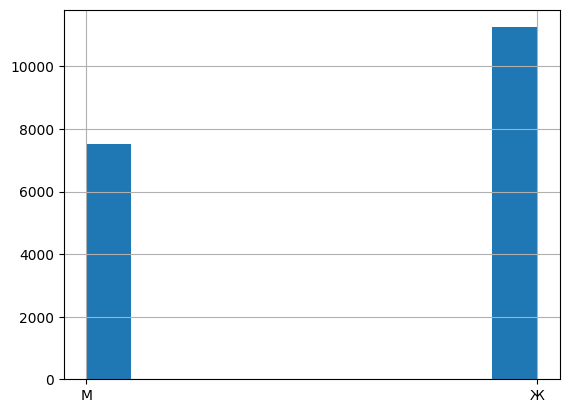

In [17]:
df['sex'] = df.message.apply(lambda x: man_or_woman(x))
df['sex'].explode().hist()

In [18]:
def age(text):
    if pd.notna(text):
        pattern = re.compile(r'\b[МмЖж]..?\d\d|\b[МмЖж]\d\d|\b\d\d\sгода?|\b\d\d\sлет')
        listage = pattern.findall(text)
        list_to_write = []
        for i in listage:
            if i[-2:].isalpha():
                list_to_write.append(int(i[:2]))
            else:
                list_to_write.append(int(i[-2:]))
        return list_to_write
    return 0

<AxesSubplot: >

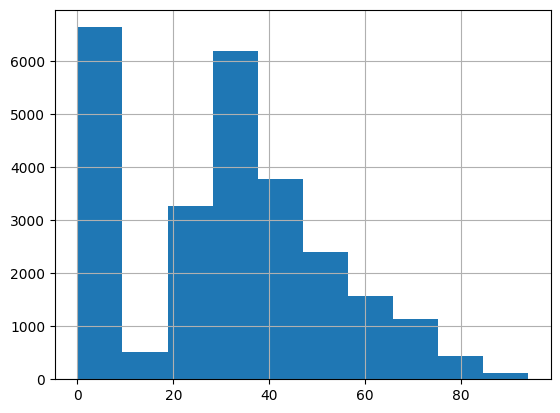

In [21]:
df['age'] = df.message.apply(lambda x: age(x))
df['age'].explode().hist()

In [22]:
def avg_bau(text):
    if pd.notna(text):
#        ages = re.compile(r'\b[МмЖж]..?\d\d|\b[МмЖж]\d\d|\b\d\d\sгода?|\b\d\d\sлет')
        bau = re.compile(r'\d+\s+\bBAU')
#        listage = ages.findall(text)
        llistage = bau.findall(text)
        list_to_write = []
        
        for i in range(len(llistage)):
            llistage[i] = float(llistage[i][:-3])
        list_to_write.append(numpy.mean(llistage))
        if type(list_to_write[-1]) is list:
            list_to_write[-1] = list_to_write[-1].to_list()[0]
#            if i[-2:].isalpha():
#                list_to_write.append([int(i[:2]), llistage[-1][:-3]])
#            else:
#                list_to_write.append([int(i[-2:]), llistage[-1][:-3]])
        return list_to_write
    return 0

In [ ]:
df['average_bau'] = df.message.apply(lambda x: avg_bau(x))

In [25]:
df_copy = df.copy()
df_copy['average_bau'] = df['average_bau'].explode()
df_copy = df_copy.dropna(subset=['average_bau'])

In [ ]:
x = numpy.array(df_copy['age'].explode()[:df_copy.shape[0]]).reshape(1, -1)[0]
y = numpy.array(df_copy['average_bau']).reshape(1, -1)[0]
mean = numpy.mean(x)
for i in range(len(x)):
    if x[i] == numpy.nan:
        x[i] = mean

In [ ]:
bins = numpy.linspace(0, 100, 11)
print(bins)
dic = {}
for i in range(len(bins[:-1])):
    array_category = []
    for j in range(df_copy.shape[0]):
        if x[j] >= bins[i] and x[j] < bins[i + 1]:
            array_category.append(y[j])
    dic[bins[i+1]] = numpy.mean(array_category)

In [29]:
print(dic)

{10.0: 0.0, 20.0: 47.323076923076925, 30.0: 670.8928174603174, 40.0: 414.3681405895692, 50.0: 397.14588361491013, 60.0: 515.5261904761905, 70.0: 330.0804597701149, 80.0: 311.1222222222222, 90.0: 860.5677083333334, 100.0: nan}


In [30]:
xm = dic.keys()
ym = dic.values()
print(xm, ym)

dict_keys([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]) dict_values([0.0, 47.323076923076925, 670.8928174603174, 414.3681405895692, 397.14588361491013, 515.5261904761905, 330.0804597701149, 311.1222222222222, 860.5677083333334, nan])


<BarContainer object of 10 artists>

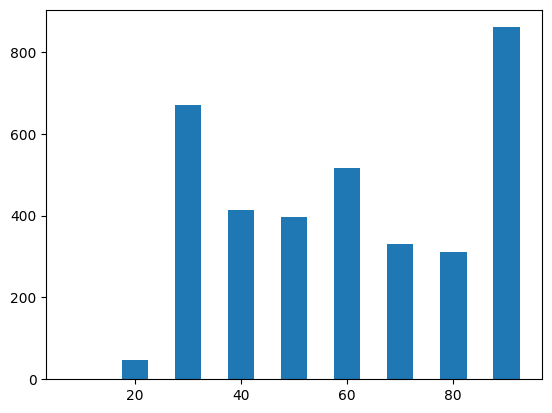

In [31]:
plt.bar(xm, ym, width=5)